<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Point-Pattern-Analysis" data-toc-modified-id="Point-Pattern-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Point Pattern Analysis</a></span><ul class="toc-item"><li><span><a href="#Point-pattern-file-import" data-toc-modified-id="Point-pattern-file-import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Point pattern file import</a></span></li><li><span><a href="#Preparing-Information" data-toc-modified-id="Preparing-Information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preparing Information</a></span></li><li><span><a href="#Plotting-dependencies-in-graph" data-toc-modified-id="Plotting-dependencies-in-graph-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting dependencies in graph</a></span></li><li><span><a href="#Hex-binning" data-toc-modified-id="Hex-binning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Hex-binning</a></span></li><li><span><a href="#Kernel-density-estimation-(KDE)" data-toc-modified-id="Kernel-density-estimation-(KDE)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Kernel density estimation (KDE)</a></span></li><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Algorithm</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li></ul></li></ul></div>

# Point Pattern Analysis

## Point pattern file import
There are a lot of bus stops in Aachen, the AVV provides information of their bus system. First we need to load the CSV file. As the table show, one gets little information, imported for us are the coordinates. Having a look at the README file provided by the AVV, one knows why the coordinates look like this, they are multiplied by 1000000. Before using them we need to divide all coordinate content by 1000000.

In [1]:
import numpy
import pandas as pd
import geopandas
import pysal
import seaborn
import contextily
import os
import matplotlib.pyplot as plt 
avv_halt = pd.read_csv(r"./data/AVV_Haltestellen.csv", sep=',', engine='python')
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,WGS84_RW_X_1000000,WGS84_HW_X_1000000,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6089768.0,50776453.0,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6075421.0,50759141.0,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6083328.0,50782274.0,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6100047.0,50783114.0,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6083912.0,50768538.0,de:05334:1005


## Preparing Information
Let us get all existing elements and divide the first column "WGS84_RW_X_1000000" than we do the second one. To make it easier, one could implement a function instead, to keep it clean and simple.

In [2]:
#First changing data from the first column
ort = avv_halt['WGS84_RW_X_1000000'] 
old = []
new = []
for elem in ort:
    old.append(elem)
    elem = elem / 1000000
    new.append(elem)

In [3]:
avv_halt['WGS84_RW_X_1000000'].replace(old, new, inplace = True)
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,WGS84_RW_X_1000000,WGS84_HW_X_1000000,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50776453.0,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50759141.0,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50782274.0,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50783114.0,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50768538.0,de:05334:1005


In [4]:
#Second changing data from the second column
ort2 = avv_halt['WGS84_HW_X_1000000'] 
old2 = []
new2 = []
for elem2 in ort2:
    old2.append(elem2)
    elem2 = elem2 / 1000000
    new2.append(elem2)

In [5]:
avv_halt['WGS84_HW_X_1000000'].replace(old2, new2, inplace = True)
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,WGS84_RW_X_1000000,WGS84_HW_X_1000000,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50.776453,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50.759141,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50.782274,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50.783114,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50.768538,de:05334:1005


As the existing column name is a little long we change it to longitude and latitude, as they are not just shorter but also more intuitive.

In [6]:
avv_halt = avv_halt.rename(columns = {'WGS84_HW_X_1000000' : 'latitude'})
avv_halt = avv_halt.rename(columns = {'WGS84_RW_X_1000000' : 'longitude'})
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,longitude,latitude,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50.776453,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50.759141,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50.782274,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50.783114,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50.768538,de:05334:1005


## Plotting dependencies in graph
We use seaborn here to plot our points in a dependent graph. As you may see the points are ordered and the point dataset get a dimension. One can see point concentration in different areas.

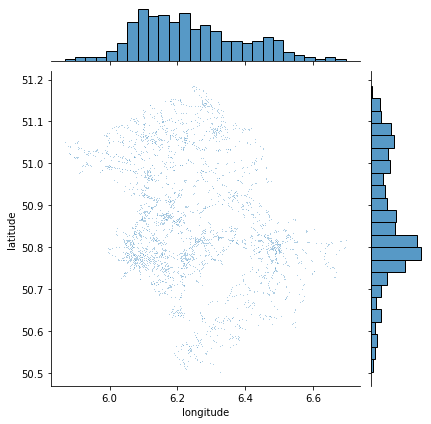

In [7]:
seaborn.jointplot(x='longitude', y='latitude', data=avv_halt, s=0.5);

Next, we use the library contextily, because one can use the **add_basemap()** method to add a base map to provide a context. 

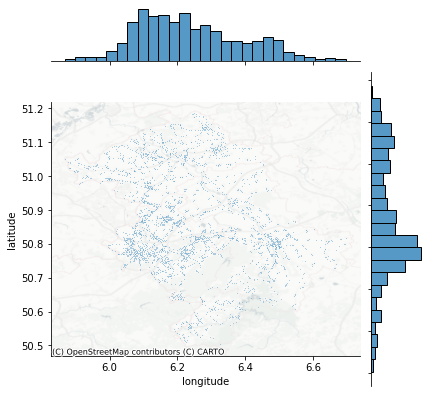

In [8]:
joint_axes = seaborn.jointplot(
    x='longitude', y='latitude', data=avv_halt, s=0.5
)
#Adding a basemap for better visualization
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

## Hex-binning
Binning is a technique for data aggregation, used for gruping a data of a dataset. Therefore the datasaet of *n* values will be converted into lee than *n* discete groups. We just consider 2 dimensional (x, y coordinates) datasets. The technique is simple: a plane (x,y) is uniformly tiled in polygones, which can be squares, rectangles or hexagons.
Which means: Hexbinning is a specific way for creating choropleth maps. The main adventage of hexagons in comparison with rectangles is, that they are more similar to cicles than squares, therefore the data aggregation around a bin center is more efficient, when similar vaules provoce a lot of overplotting.

Let us take a look at an example:  

When many bus stops (points) are concentrated in some area it can become hard to explore the patterns' nature. To simplify and improve the visibility one generate a regular grid (hexagonal). Depending on how many points fall in one grid cell, the colour is chosen. 

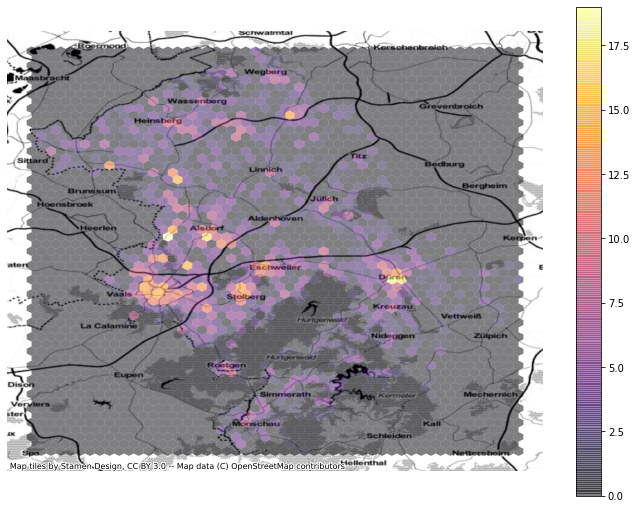

In [32]:
f, ax = plt.subplots(1, figsize=(12, 9))
#Generating the hexbin plot
hb = ax.hexbin(
    avv_halt['longitude'],
    avv_halt['latitude'], 
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='inferno'
)
#Adding a basemap
contextily.add_basemap(
    ax, 
    crs="EPSG:4326",
    source=contextily.providers.Stamen.Toner
)
plt.colorbar(hb)
ax.set_axis_off()

## Kernel density estimation (KDE)
The grids are the spatial equivalent of a histogram. An alternative is the kernel density estimation (an empirical approximation of the probability density function). Instead of a grid of squares of hexagons the kde uses a grid of points is placed over the area of interest on which it placed kernel functions that count points around them with different weight based on the distance. Furthermore the counts are aggregated to generate a (global) surface with probabilit. The most common kernel function is the Gaussian one. Here, a normal distribution to weight points in applied. The result is a continuous surface. The following function creates a Gaussian kernel. 

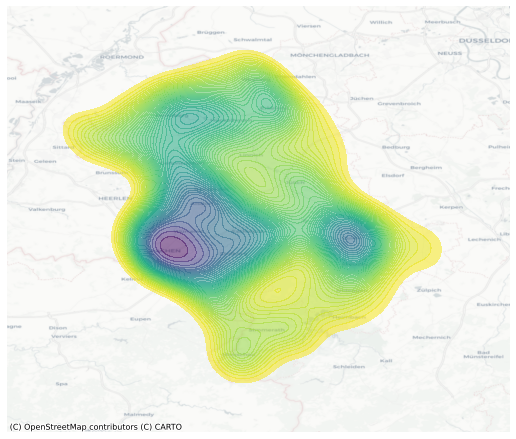

In [31]:
f, ax = plt.subplots(1, figsize=(9, 9))
#Generating the kde plot
seaborn.kdeplot(
    x = avv_halt['longitude'],
    y = avv_halt['latitude'], 
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
#Adding a basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron,
    
)
ax.set_axis_off()

## Algorithm
An algorithm is a unique set of rules for solving a problem. It does not necessarily have to be code in programming languages, an algorithm can also be written in natural language or, for example, pseudocode. There are a few important properties that make up an algorithm, including determinism, finiteness and effectiveness. For example, a calculation formula such as the Pythagorean theorem is an algorithm.

### Exercise
Look at the point analysis again carefully and note which steps are taken here and why. Describe what happens whereby adding notes '#' in the code. If you are working with code, it is important that you understand the steps. Change the code and see what happens. Load the file 'nodes-forest_ac.geojson' and use the same algorithm but use different layout information.